# Modelos de clasificación para Recursos Humanos
> Analisis y predicción de renuncia de empleados.  

- toc: false 
- badges: true
- comments: false
- categories: [RandomForest, OneHotEncoder]
- image: images/distancia.png

El área de recursos humanos quiere disminuir la cantidad de empleados que abandonan la empresa. Se requiere de un análisis de los factores que llevan a las renuncias y la creación de un modelo de clasificación que prediga que empleados puedan tender a dejar su puesto.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

import tensorflow as tf
pd.set_option("max_columns", None)


In [3]:
df = pd.read_csv(r"\Users\pablo\Documents\Data_Science\Data_sets\Human_Resources.csv")

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## EDA

- La variable Attrition es nuestro target
- No hay valores faltantes
- Las variables Atrittion, Over18 y OverTime pueden convertirse en variable binarias

In [4]:
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
df["OverTime"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)
df["Over18"] = df["Over18"].apply(lambda x: 1 if x == "Y" else 0)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

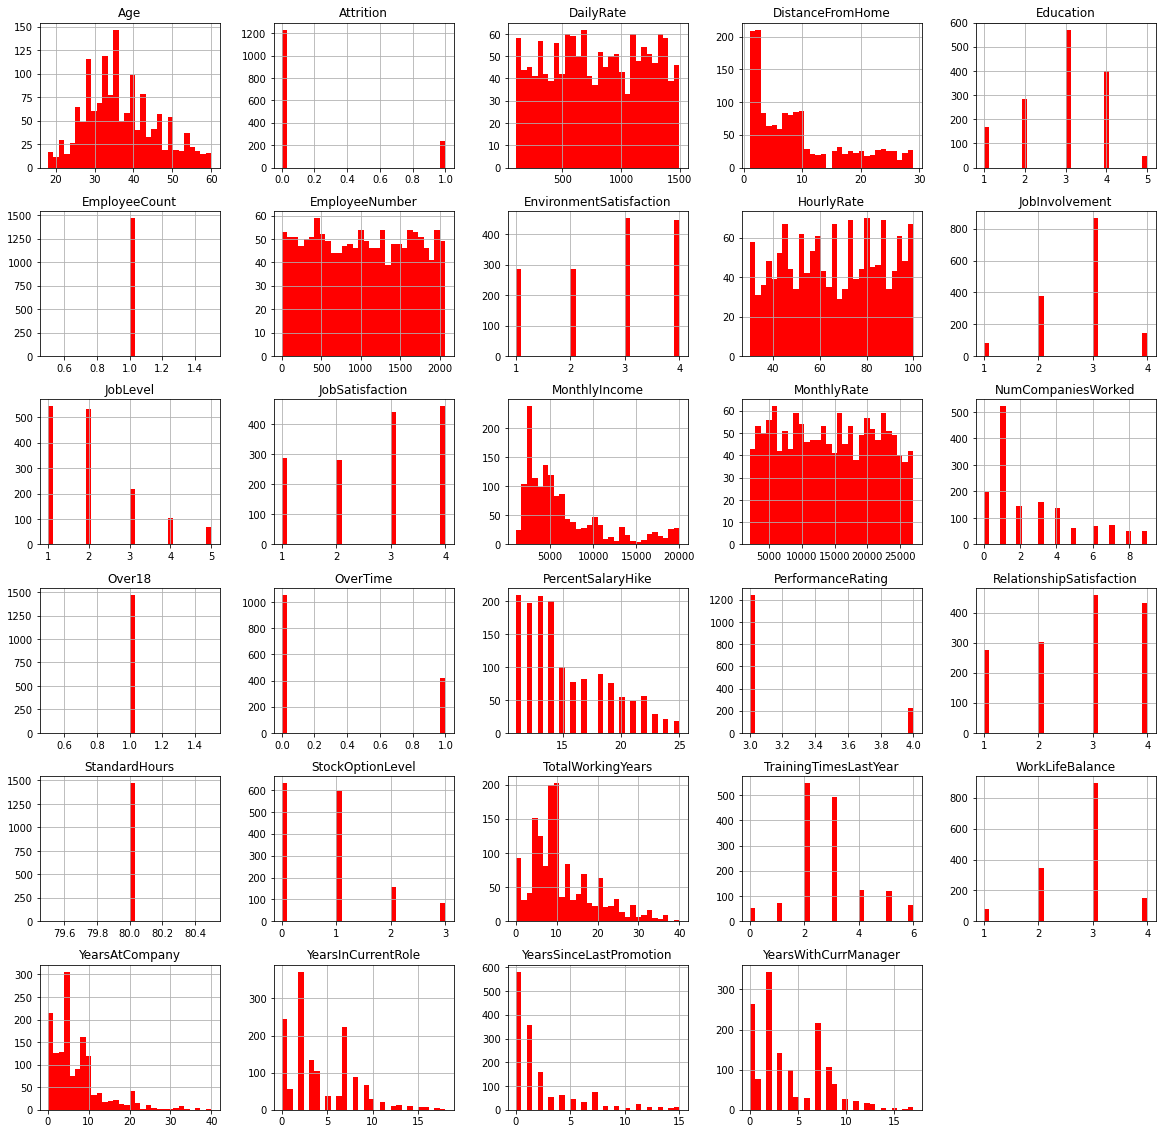

In [20]:
df.hist(bins=30, figsize=(20,20), color="r")

- La mayoria de los empleados están en el rango de los 30 a 40 años.
- Solo un 16% de los datos corresponden a empleados que han renunciado.

In [31]:
df["Attrition"].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

#### Borrado de variables

Algunas variables no cambian o no generan información útil para el análisis y el modelo.

In [5]:
df.drop(columns=["Over18", "StandardHours", "EmployeeNumber", "EmployeeCount"], inplace=True)

#### División del dataset para el análisis

In [6]:
left_df = df[df["Attrition"] == 1]
stayed_df = df[df["Attrition"] == 0]

In [34]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [35]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


- La edad promedio de los que se quedan es de 37.5 con respecto a los que se van que es 33.6.
- En promedio los empleados que se van viven más lejos.
- Los empleados que se van tienen un nivel en la empresa más bajo.
- El sueldo mensual de los que se van es menor.
- Los que se van hacen más horas extra.
- Los que se van tienen menos acciones de la empresa.
- Los que se van han trabajado menos años en la compañía.

<AxesSubplot:>

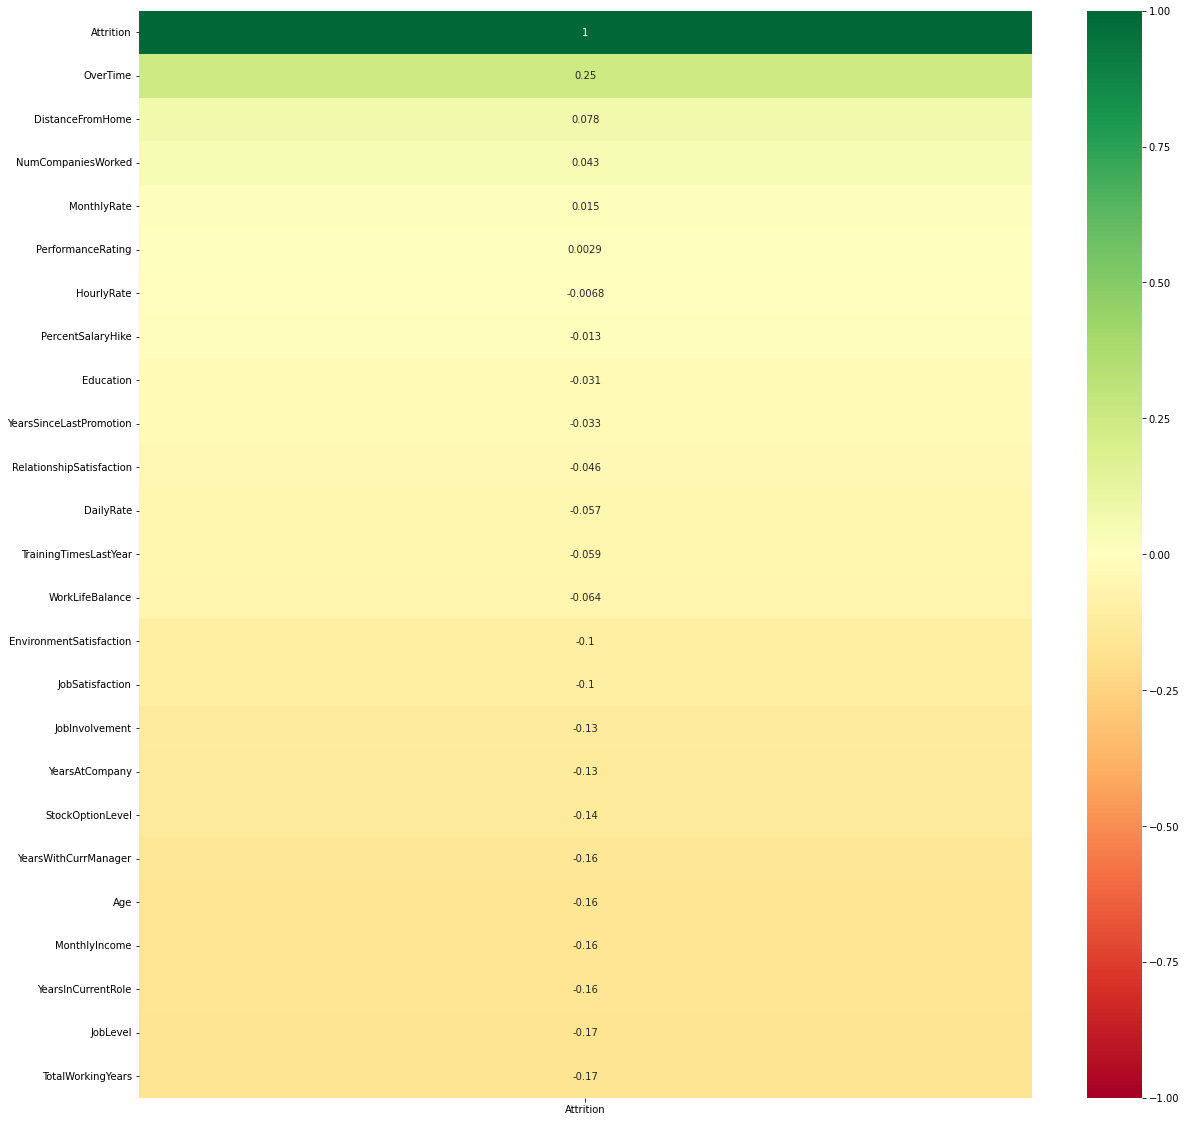

In [6]:
f, ax = plt.subplots(figsize= (20,20))
df_corr = df.corr().loc[:, ['Attrition']].sort_values('Attrition', ascending=False)
sns.heatmap(df_corr, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)

<AxesSubplot:>

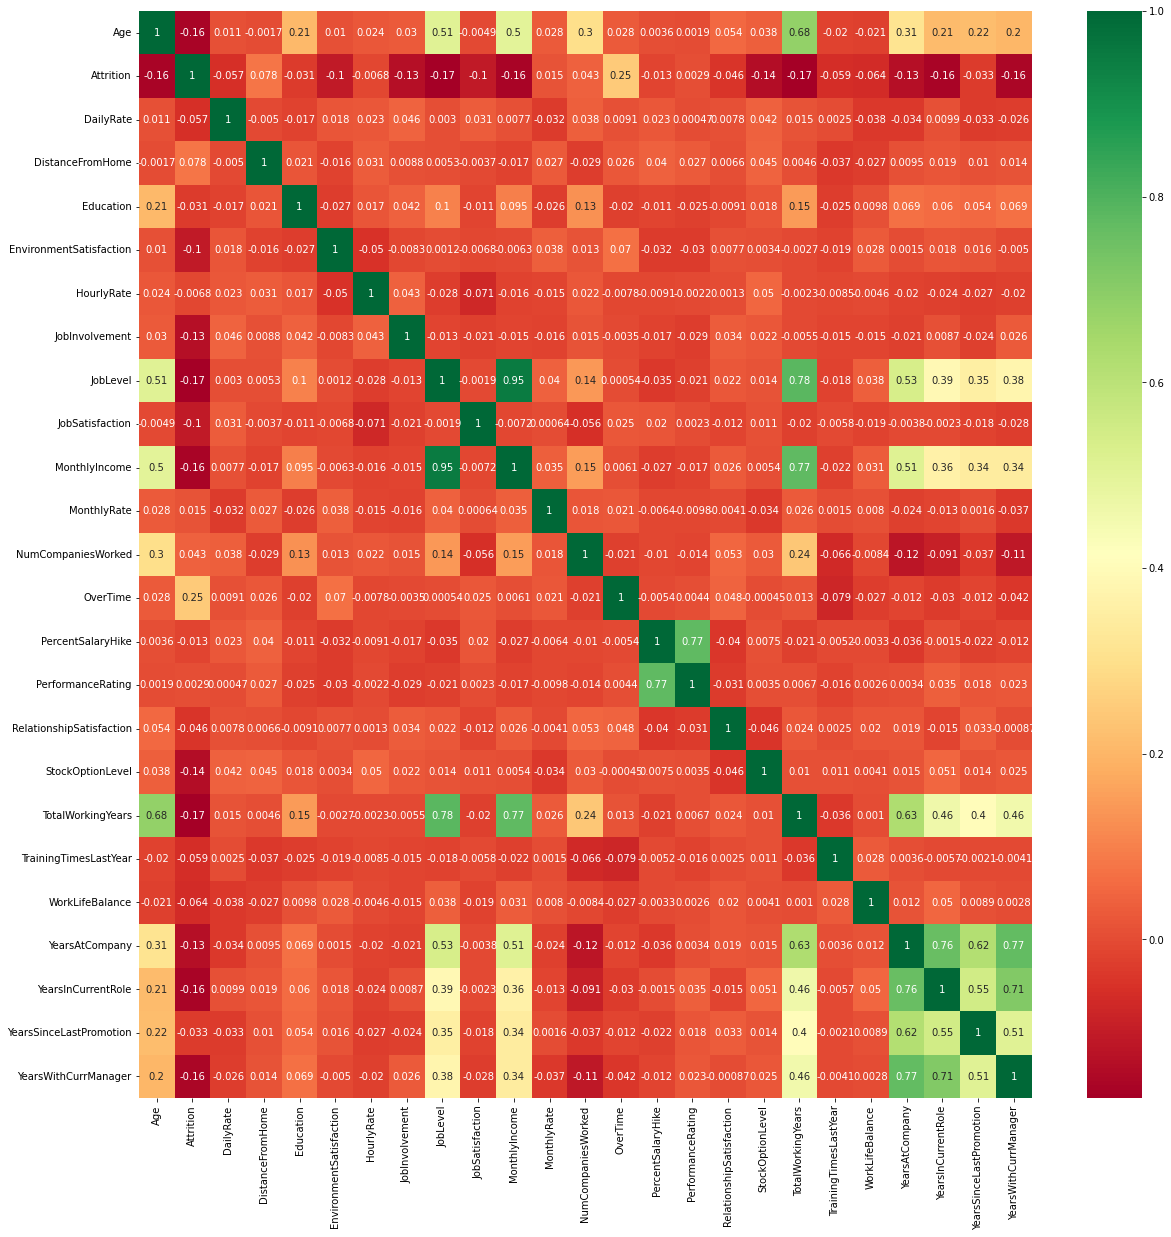

In [44]:
f, ax = plt.subplots(figsize= (20,20))
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)

#### Comparamos los datos

Renuncia según la edad

Text(0.5, 0, 'Renuncia según la edad')

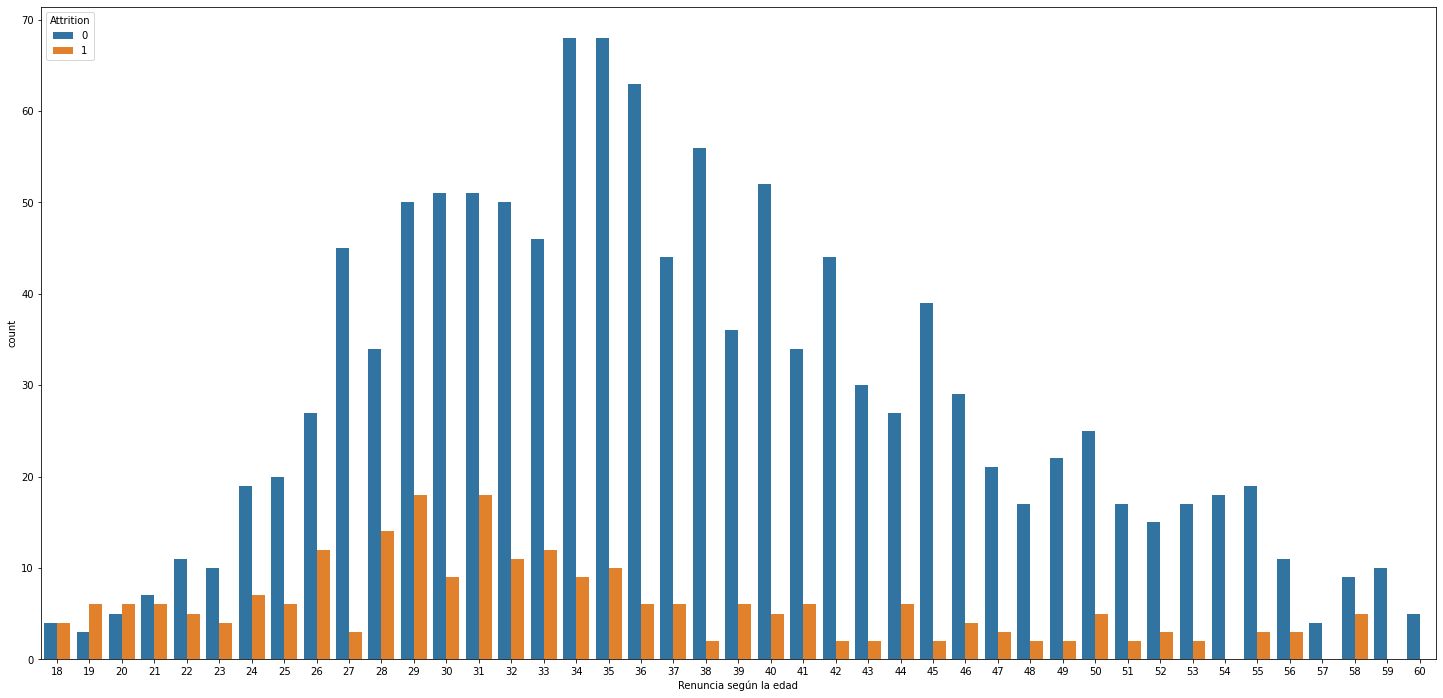

In [57]:
plt.figure(figsize=[25,12])
sns.countplot(x="Age", hue = "Attrition", data= df)
plt.xlabel("Renuncia según la edad")

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

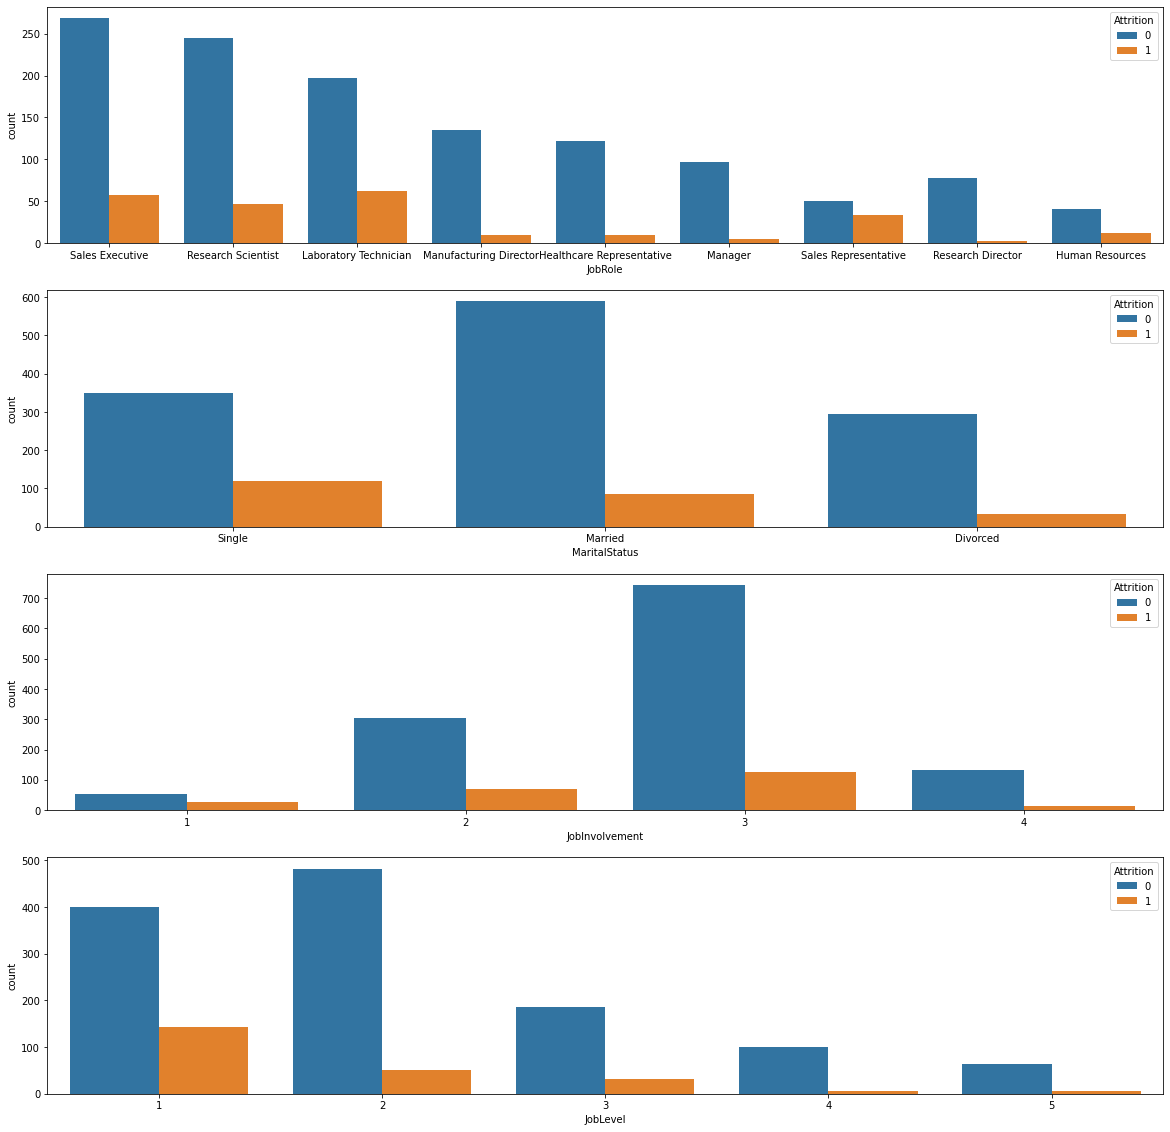

In [50]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x="JobRole", hue = "Attrition", data= df)
plt.subplot(412)
sns.countplot(x="MaritalStatus", hue = "Attrition", data= df)
plt.subplot(413)
sns.countplot(x="JobInvolvement", hue = "Attrition", data= df)
plt.subplot(414)
sns.countplot(x="JobLevel", hue = "Attrition", data= df)

Distancia de la casa al trabajo:

Text(0.5, 0, 'Distancia de casa al trabajo')

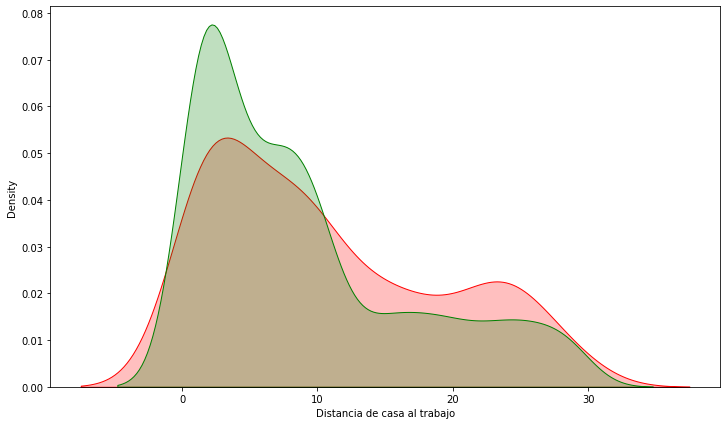

In [66]:
plt.figure(figsize=[12,7])

sns.kdeplot(left_df["DistanceFromHome"], label = "Empleados que se marchan", shade = True, color = "r", cbar=True)
sns.kdeplot(stayed_df["DistanceFromHome"], label = "Empleados que se quedan", shade = True, color = "g", cbar=True)
plt.xlabel("Distancia de casa al trabajo")

Años con el mismo manager:

Text(0.5, 0, 'Años con el mismo manager')

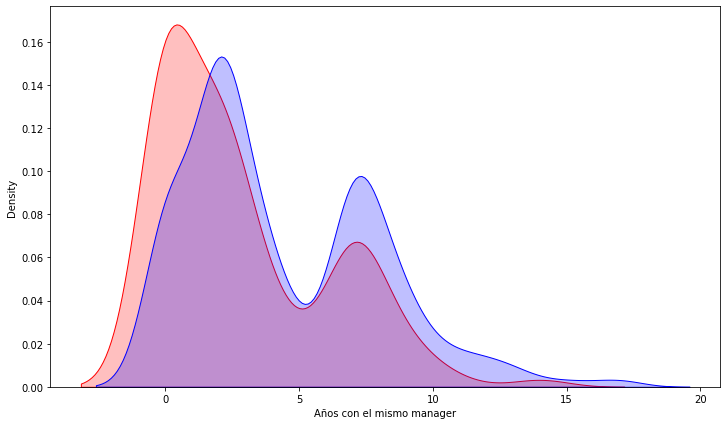

In [44]:
plt.figure(figsize=[12,7])

sns.kdeplot(left_df["YearsWithCurrManager"], label = ["Empleados que se marchan"], shade = True, color = "r")
sns.kdeplot(stayed_df["YearsWithCurrManager"], label = "Empleados que se quedan", shade = True, color = "b")
plt.xlabel("Años con el mismo manager")

Años totales trabajados:

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

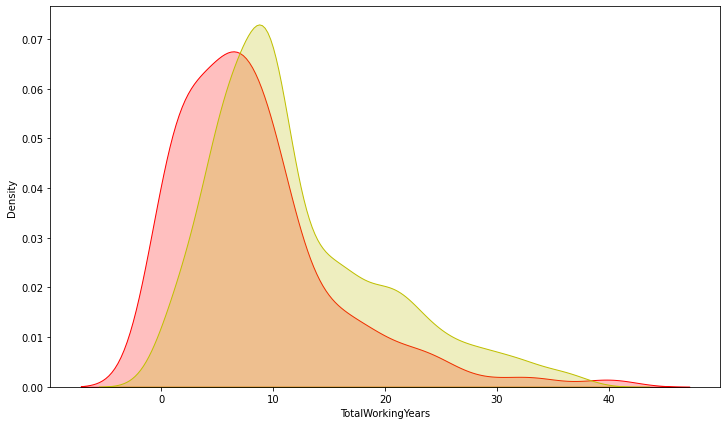

In [59]:
plt.figure(figsize=[12,7])

sns.kdeplot(left_df["TotalWorkingYears"], label = "Empleados que se marchan", shade = True, color = "r")
sns.kdeplot(stayed_df["TotalWorkingYears"], label = "Empleados que se quedan", shade = True, color = "y")

Relación del salario con el sexo de los empleados

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

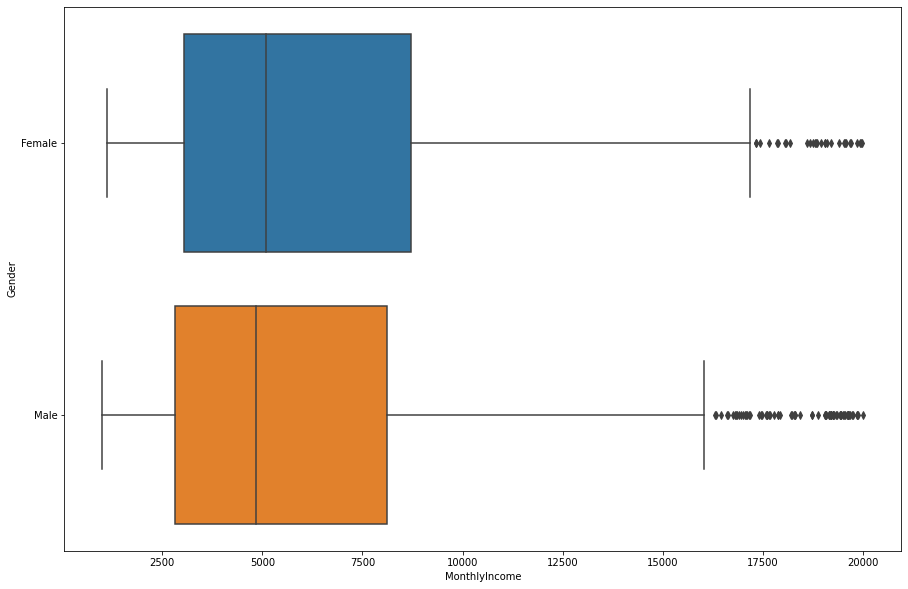

In [69]:
plt.figure(figsize=[15,10])
sns.boxplot(data=df, x="MonthlyIncome", y="Gender")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

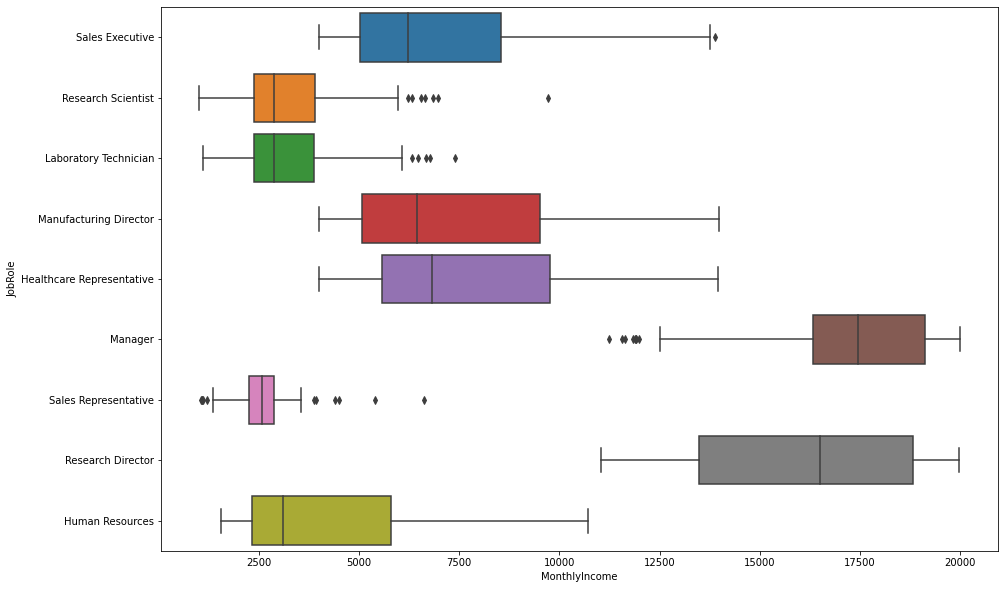

In [72]:
plt.figure(figsize=[15,10])
sns.boxplot(x = "MonthlyIncome", y = "JobRole", data = df)

In [7]:
val_cat = df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]

In [8]:
ohe = OneHotEncoder()
val_cat = ohe.fit_transform(val_cat).toarray()
val_cat = pd.DataFrame(val_cat)

In [8]:
val_cat.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
950,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
352,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in 
                  ['int64', 'float64']]
numerical = df[numerical_cols]
numerical = numerical.drop(columns="Attrition")

In [11]:
df_ohe = pd.concat([val_cat, numerical], axis=1)

In [11]:
df_ohe.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
249,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45,1199,7,4,1,77,4,2,3,6434,5118,4,0,17,3,4,1,9,1,3,3,2,0,2
1023,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,56,1255,1,2,1,90,3,1,1,2066,10494,2,0,22,4,4,1,5,3,4,3,2,1,0
1190,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,32,977,2,3,4,45,3,2,2,5470,25518,0,0,13,3,3,2,10,4,2,9,5,1,6


In [49]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_ohe.values)

In [50]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [51]:
y = df["Attrition"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Entrenamiento de modelos

Entrenamos tres modelos de clasificación y evaluamos su desempeño.

#### Logistic regression

In [53]:
modelo = LogisticRegression()

In [54]:
modelo.fit(X_train, y_train)

LogisticRegression()

In [55]:
predict = modelo.predict(X_test)

<AxesSubplot:>

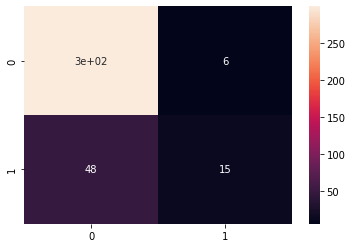

In [56]:
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       305
           1       0.71      0.24      0.36        63

    accuracy                           0.85       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.84      0.85      0.82       368



#### Random Forest

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rf_predict = rf.predict(X_test)
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       305
           1       0.75      0.14      0.24        63

    accuracy                           0.85       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.83      0.85      0.80       368



<AxesSubplot:>

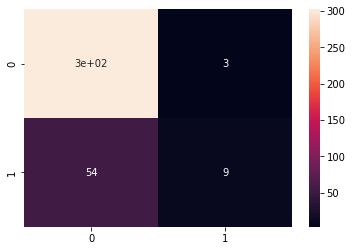

In [60]:
cm = confusion_matrix(y_test, rf_predict)
sns.heatmap(cm, annot=True)

#### NNA

In [61]:
modelo_nna = tf.keras.models.Sequential()
modelo_nna.add(tf.keras.layers.Dense(units = 500, activation= "relu", input_shape=(50, )))
modelo_nna.add(tf.keras.layers.Dense(units = 500, activation="relu"))
modelo_nna.add(tf.keras.layers.Dense(units = 500, activation="relu"))
modelo_nna.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

In [35]:
modelo_nna.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [62]:
modelo_nna.compile(optimizer="Adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [39]:
epochs_hist = modelo_nna.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.4428 - accuracy: 0.8321
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8566
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.8657
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.8893
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.9011
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2639 - accuracy: 0.8984
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2363 - accuracy: 0.9056
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9238
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1536 - accuracy: 0.9356
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1158 - accuracy: 0.9555
Epoch 11/

In [41]:
predict_nna = modelo_nna.predict(X_test)
prediction_nna = (predict_nna > 0.5)

Text(0.5, 1.0, 'Pérdida del modelo')

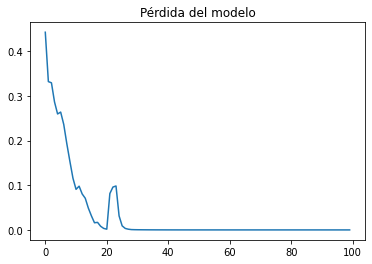

In [42]:
plt.plot(epochs_hist.history["loss"])
plt.title("Pérdida del modelo")

<AxesSubplot:>

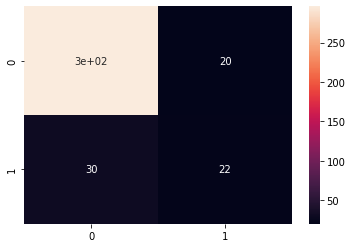

In [45]:
cm = confusion_matrix(y_test, prediction_nna)
sns.heatmap(cm, annot=True)

In [46]:
nna_predict = modelo_nna.predict(X_test)
print(classification_report(y_test, prediction_nna))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       316
           1       0.52      0.42      0.47        52

    accuracy                           0.86       368
   macro avg       0.72      0.68      0.70       368
weighted avg       0.85      0.86      0.86       368

